# Air Quality India Data Analysis (2017-2022)

## Data Source

The data for this analysis has been taken from <a href="https://www.kaggle.com/datasets/fedesoriano/air-quality-data-in-india">Here</a>.

## Imports

In [1]:
import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

## Loading and exploring dataset

In [2]:
df=pandas.read_csv("air-quality-india.csv")

In [3]:
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [4]:
df.shape

(36192, 6)

In [5]:
df['PM2.5'].mean()

49.30842865826703

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


Its easily visible that they are in wrong data types so they must be converted

In [7]:
df['Timestamp']=pandas.to_datetime(df['Timestamp'])

So on an average the air pollution level is around 50.

It has no null points at all, but by exploring even more datasets we can add few more features to it.

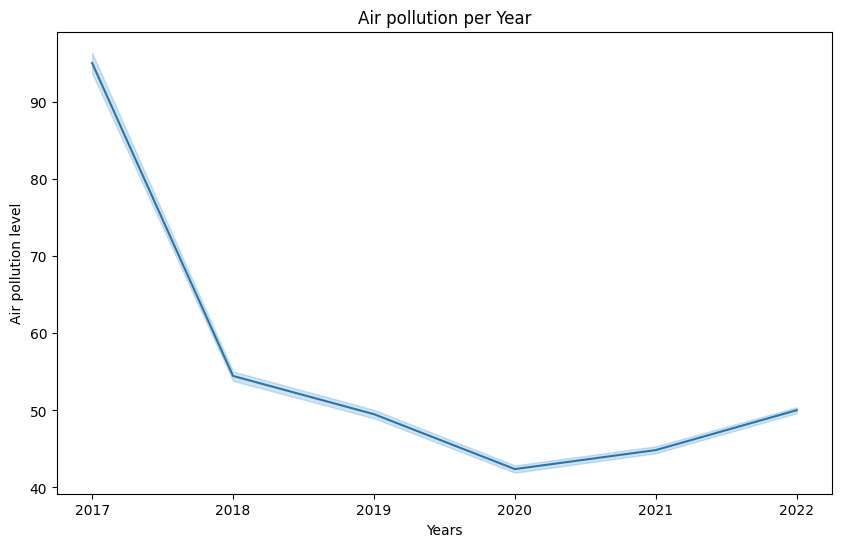

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x=df.Year,y='PM2.5')
plt.xlabel("Years")
plt.ylabel("Air pollution level")
plt.title("Air pollution per Year")
plt.show()

Its visible that in 2020 the least pollution occured, Corono virus can be the reason to it, however we must not jump into conclusions as the previous years were also slightly in a decreasing manner.
Very soon as lockdowns were no more existant the pollution levels slightly starts to rise.
We must do some further more data exploration to find out more reasons to it

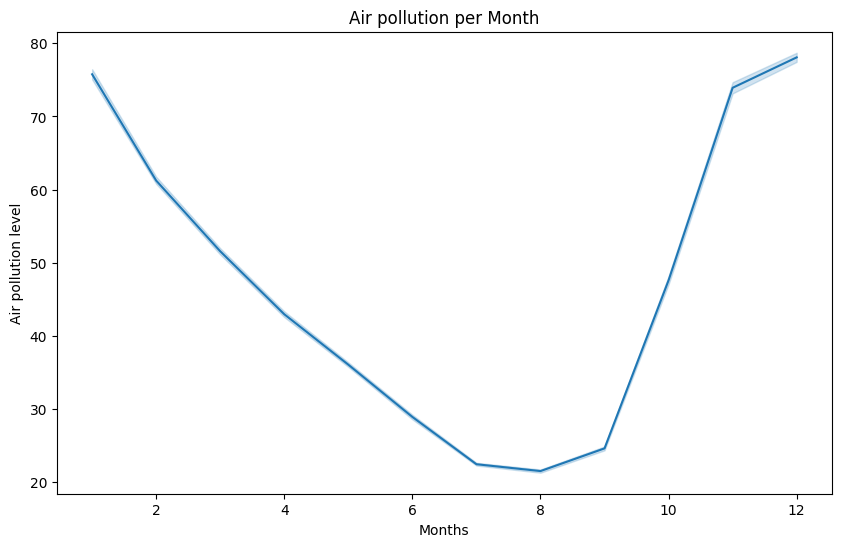

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x=df.Month,y='PM2.5')
plt.xlabel("Months")
plt.ylabel("Air pollution level")
plt.title("Air pollution per Month")
plt.show()

It is visible that in the month of August the least amount of pollution occurs, this is mainly because of the rains, and this phenomenon is usually known as **"Wet Deposition"**

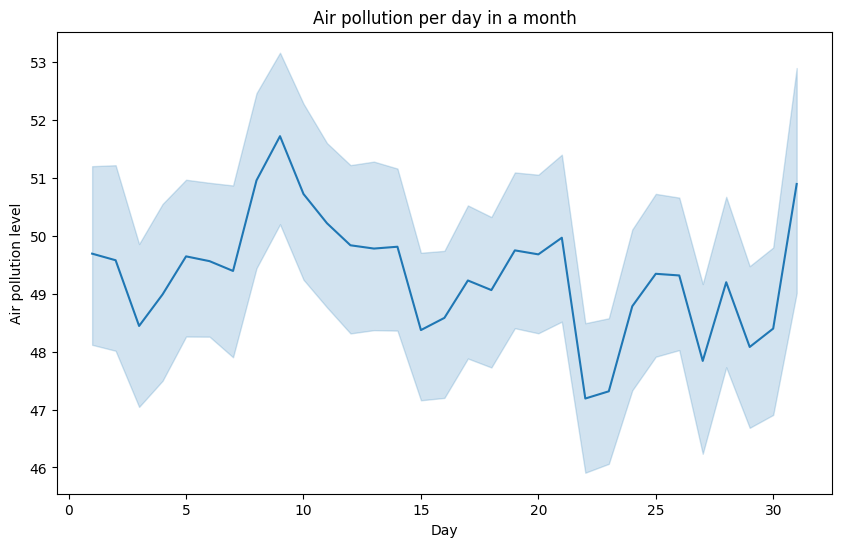

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x=df.Day,y='PM2.5')
plt.xlabel("Day")
plt.ylabel("Air pollution level")
plt.title("Air pollution per day in a month")
plt.show()

This visualization seems to be really fluctuative and hence its difficult to draw any conclusions from this particular visualization

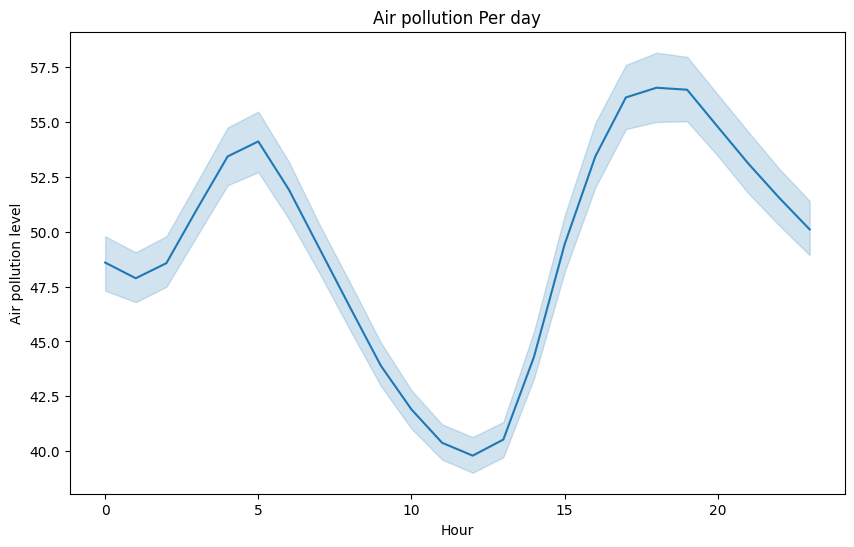

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x=df.Hour,y='PM2.5')
plt.xlabel("Hour")
plt.ylabel("Air pollution level")
plt.title("Air pollution Per day")
plt.show()

We can see the data shows a sudden change in air polluation at 5AM, 12PM and after 4-5PM.
This can be due to the business hours, all of them usually start in the morning , maybe in the noon there's a break and in the afternoon they start to work again. Once again, we can't directly jump into conclusions we must further explore it

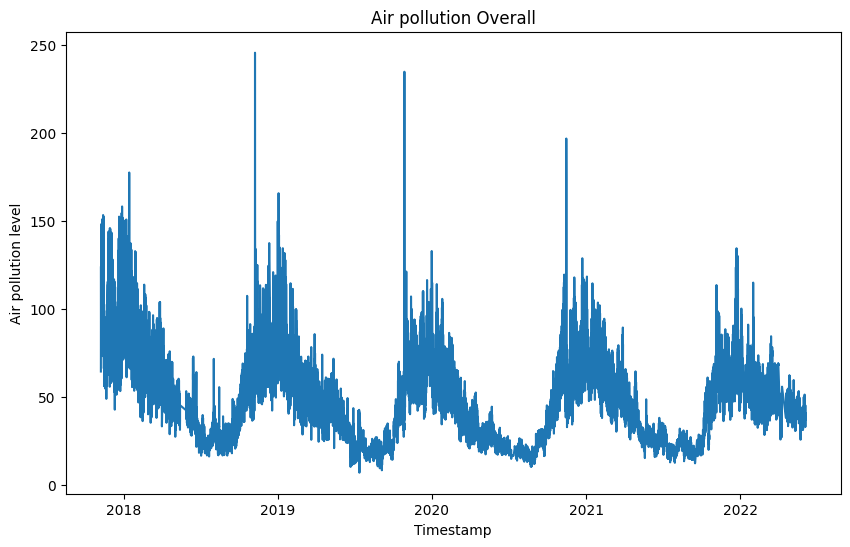

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x=df.Timestamp,y='PM2.5')
plt.xlabel("Timestamp")
plt.ylabel("Air pollution level")
plt.title("Air pollution Overall")
plt.show()

This data suggests there must be some constant factors working on air pollution, leading to a common pattern of air pollution each year. We can see that each year as soon as the year starts there is a sudden peak in air pollution and gradually it slows down.

## Preparing data for model

In [13]:
dfNew=pandas.DataFrame(df.groupby('Timestamp')['PM2.5'].mean())
dfNew.head()

,PM2.5
Timestamp,
2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,116.50


## Splitting data

In [14]:
dfNew=dfNew.reset_index()

In [15]:
dfNew['Hour']=dfNew['Timestamp'].dt.hour
dfNew['Day']=dfNew['Timestamp'].dt.day
dfNew['Year']=dfNew['Timestamp'].dt.year
dfNew['Month']=dfNew['Timestamp'].dt.month

In [16]:
dfNew.head()

,Timestamp,PM2.5,Hour,Day,Year,Month
0,2017-11-07 12:00:00,64.51,12,7,2017,11
1,2017-11-07 13:00:00,69.95,13,7,2017,11
2,2017-11-07 14:00:00,92.79,14,7,2017,11
3,2017-11-07 15:00:00,109.66,15,7,2017,11
4,2017-11-07 16:00:00,116.50,16,7,2017,11


In [17]:
Y=numpy.asarray(dfNew['PM2.5'])

In [18]:
Y

array([64.51, 69.95, 92.79, ..., 33.05, 35.29, 40.67])

In [19]:
Y.shape

(36192,)

In [20]:
X=numpy.asarray(dfNew.drop(columns=['PM2.5','Timestamp']))

In [21]:
X

array([[  12,    7, 2017,   11],
       [  13,    7, 2017,   11],
       [  14,    7, 2017,   11],
       ...,
       [  13,    4, 2022,    6],
       [  14,    4, 2022,    6],
       [  15,    4, 2022,    6]])

In [22]:
X.shape

(36192, 4)

In [23]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

## Trainining a model

on the basis of whatever data we have now, we can create a model, however we would do the analysis even further after the model training.

In [24]:
model=RandomForestRegressor(n_estimators=150,random_state=42)

In [25]:
model.fit(Xtrain,Ytrain)

RandomForestRegressor(n_estimators=150, random_state=42)

## Predictions of Model

In [26]:
predictions=model.predict(Xtest)

In [27]:
predictions

array([69.89453333, 50.0922    , 89.15873333, ..., 78.7112    ,
       23.9446    , 30.3058    ])

In [28]:
Ytest

array([77.44, 38.7 , 96.36, ..., 73.98, 23.57, 30.95])

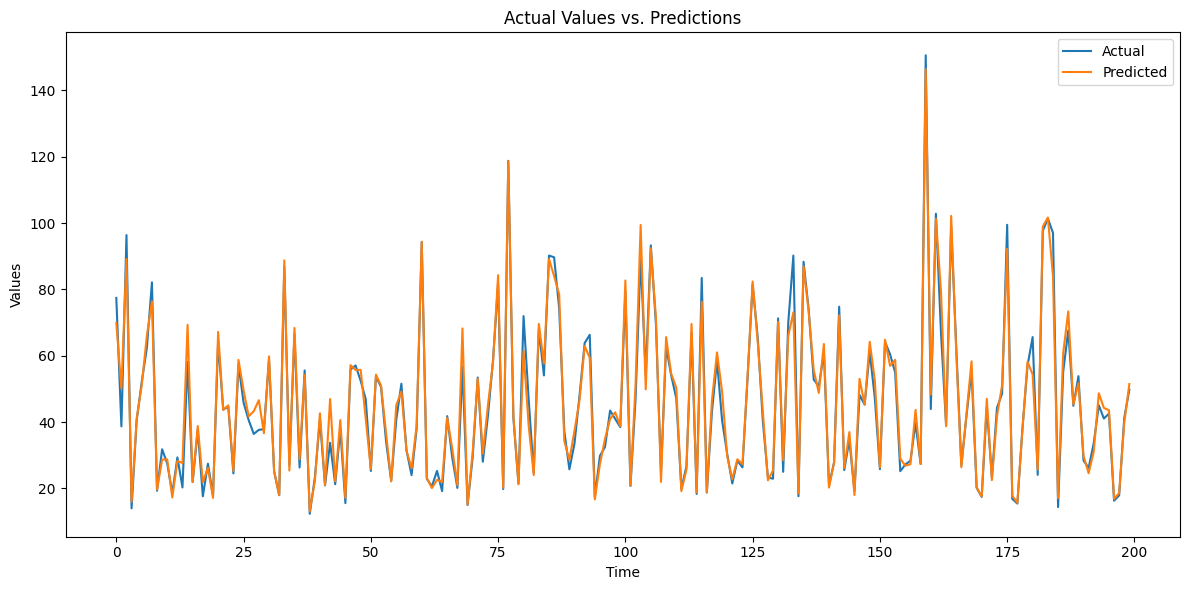

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(numpy.arange(200), Ytest[:200], label='Actual')
plt.plot(numpy.arange(200), predictions[:200], label='Predicted')
plt.title('Actual Values vs. Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()

Let's also calculate the accuracy score of this model

In [30]:
mse=mean_squared_error(Ytest,predictions)
rmse=numpy.sqrt(mse)
mae=mean_absolute_error(Ytest,predictions)
r2=r2_score(Ytest,predictions)

In [31]:
print("Mean Squared Error: ",mse)
print("Root of Mean squared Error: ",rmse)
print("Mean Absolute Error: ",mae)
print("R- Squared error: ",r2)

Mean Squared Error:  21.793092876871878
Root of Mean squared Error:  4.668307281753407
Mean Absolute Error:  2.7221482617304416
R- Squared error:  0.9646128599076852


## Some More testing on the model

Now, we will test the model manually by inputting some data

In [32]:
yr=2023
hr=16
mnth=9
day=1

inpArray=numpy.array([[hr,day,yr,mnth]])

In [33]:
model.predict(inpArray)

array([19.14766667])

### Exportion of the model

Exporting the model and compressing the file size to smallest possible way.

In [34]:
joblib.dump(model,"airQualityModel.pkl",compress=9)

['airQualityModel.pkl']

# Thank you for viewing this file:)

Hope you like the notebook, please star this repository if you like it:)